# Cleaning Data

## 1. Data in Python Request

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [3]:
df = pd.read_excel('../My_Datas/Data/Alarm Survey Data.xlsx')

In [5]:
df.head()


,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars


In [6]:
df.dtypes


survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [7]:
df.alarm_rating = pd.to_numeric(df.alarm_rating.str.replace('stars', ''))

In [8]:
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,light,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [9]:
df.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating            int64
dtype: object

## 2. Missing Data Check

In [10]:
df[df.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4
18,19,38,2.0,lightly active,NaN,1,5
23,24,24,2.0,very active,NaN,1,5
26,27,25,2.0,lightly active,NaN,1,2
28,29,29,2.0,lightly active,NaN,1,2
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3
6319,6320,44,2.0,lightly active,NaN,0,3
6375,6309,32,3.0,light,NaN,0,3
6377,6311,30,2.0,very active,NaN,0,3


In [11]:
df.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: count, dtype: int64

In [12]:
df.sleep_quality.fillna(2, inplace=True)

C:\Users\Fezeg\AppData\Local\Temp\ipykernel_13068\178404303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sleep_quality.fillna(2, inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6433 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 351.9+ KB


## 3. Inconsistent Text & Typos Check


In [14]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3


In [15]:
df.activity_level.value_counts()

activity_level
active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: count, dtype: int64

In [16]:
df.activity_level = np.where(df.activity_level.isin(['light_activity', 'light']), 'lightly active', df.activity_level)

## 4. Duplicated Data Check
- Find any duplicated data
- Deal with the duplicate data

In [17]:
df.shape

(6433, 7)

In [18]:
df=df[~df.duplicated()]

In [19]:
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5
6362,6363,31,1.0,lightly active,4.0,0,4
6363,6364,26,0.0,lightly active,5.0,0,3
6364,6365,27,1.0,active,5.0,0,3


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

In [20]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3


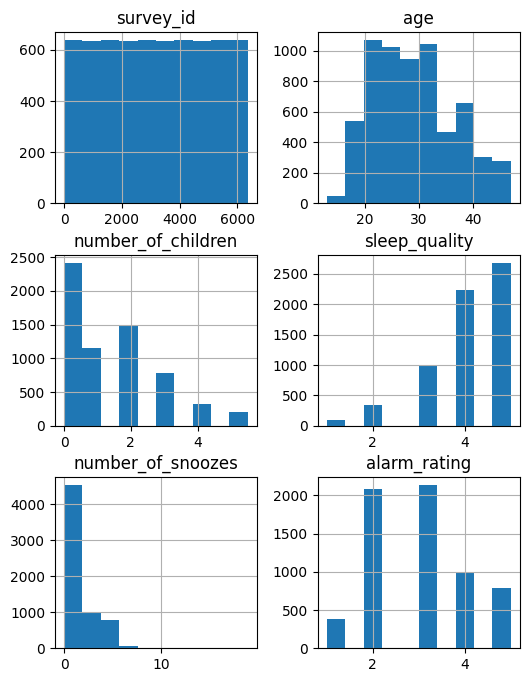

In [24]:
df.hist(figsize=(6, 8));

<Axes: xlabel='number_of_snoozes', ylabel='Count'>

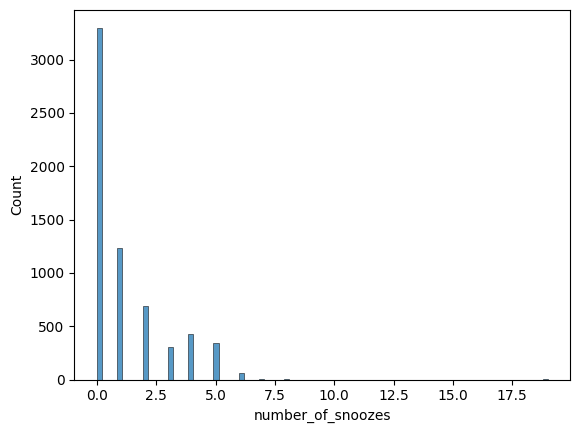

In [26]:
sns.histplot(df.number_of_snoozes)

<Axes: xlabel='number_of_snoozes'>

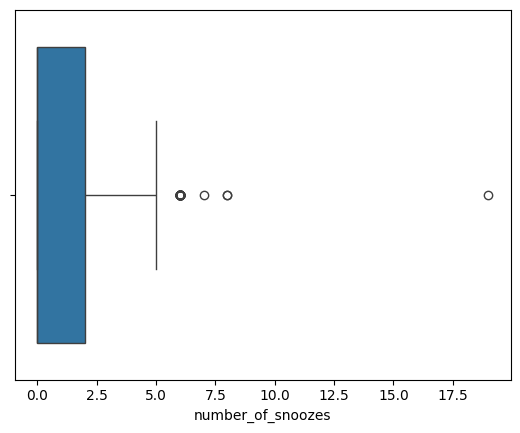

In [27]:
sns.boxplot(x = df.number_of_snoozes)

In [28]:
df.number_of_snoozes.value_counts()

number_of_snoozes
0     3300
1     1229
2      693
4      427
5      345
3      309
6       59
8        2
19       1
7        1
Name: count, dtype: int64

In [32]:
df = df[df.number_of_snoozes < 19]
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5
6362,6363,31,1.0,lightly active,4.0,0,4
6363,6364,26,0.0,lightly active,5.0,0,3
6364,6365,27,1.0,active,5.0,0,3


## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [36]:
# missing data
df[df.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [35]:
# inconsistencies
df.activity_level.value_counts()

activity_level
lightly active    3287
active            2422
very active        656
Name: count, dtype: int64

In [39]:
# duplicates values
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [40]:
#outliers
df.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000
mean,3183.882325,29.076826,1.396936,4.107620,1.155067,2.955224
std,1837.741432,7.476376,1.433575,0.963612,1.587979,1.100414
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1593.000000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3184.000000,28.000000,1.000000,4.000000,0.000000,3.000000
75%,4775.000000,34.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,5.500000,5.000000,8.000000,5.000000


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [5]:
pens = pd.read_excel('../My_Datas/Data/Pen Sales Data.xlsx')

In [18]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


In [16]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
pens['Total Spend'] = pens['Pen Cost'] + pens['Shipping Cost']

In [17]:
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise
pens["Free Shipping"] = np.where(pens['Shipping Cost'] == 0, 'Yes', 'No')

## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [ ]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
# What were the average days from purchase to delivery?

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [ ]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”